In [2]:
# Function removes multi-collinear features, Pandas profiling needs to be installed

def reject_collinear_feature(df):
    
    df_org = df.copy()
    import pandas_profiling
    from pandas_profiling import ProfileReport
    
    profile = ProfileReport(df_org)
    profile.get_rejected_variables()
    
    rem_features= list(profile.get_rejected_variables()) 
    df_clean = df_org.drop(rem_features,axis=1)
    
    return df_clean, rem_features
    


In [26]:
# Functions removes using Recursive feature elimination with cross-validation (RFECV)

def reject_RFECV_feature(df_pred, y, cv_num = 5):
    
    df_org = df_pred.copy()
    y_org = y.copy()
    

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.feature_selection import RFECV
    import matplotlib.pyplot as plt
    cv_estimator = RandomForestClassifier()

    cv_estimator.fit(df_org, y_org)
    cv_selector = RFECV(cv_estimator, cv = cv_num, step=1, scoring="accuracy")
    cv_selector = cv_selector.fit(df_org, y_org)
    rfecv_mask = cv_selector.get_support()

    rfecv_features = []
    rem_features = []
    for bool, feature in zip(rfecv_mask, df_org.columns):
        if bool:
            rfecv_features.append(feature)
        if ~bool:
            rem_features.append(feature)

    df_clean = df_org[rfecv_features]
    best_features = rfecv_features
    
    
     
    return df_clean, rem_features
    
    


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Example of Function

df = pd.read_csv('ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/WDBC.dat', header = None)
y = df[1].map({'B':0,'M':1})
df.drop(columns = [0,1], inplace = True)

# pandas_profiling.ProfileReport(df)

df_clean, rem_features = reject_collinear_feature(df)
df_clean2, rem_features2 = reject_RFECV_feature(df, y)

C:\Users\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [28]:
rem_features

[4, 5, 9, 14, 15, 22, 23, 24, 25, 29]

In [29]:
rem_features2

[4, 6, 7, 10, 11, 12, 13, 16, 17, 19, 20, 21, 31]

C:\Users\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Optimal number of features : 11
Best features : [3, 5, 8, 9, 15, 22, 23, 24, 25, 26, 29]


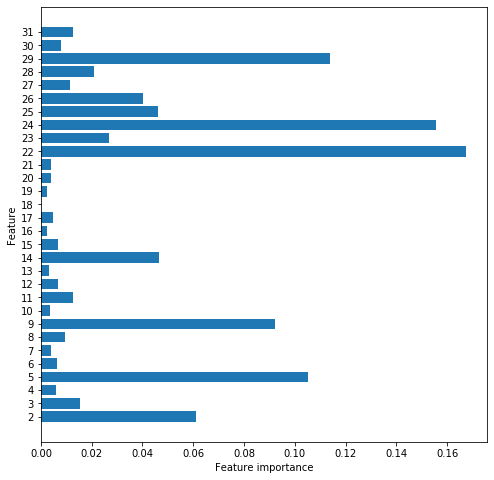

In [23]:
  
df_org = df.copy()
y_org = y.copy()
cv_num = 5


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
cv_estimator = RandomForestClassifier()

cv_estimator.fit(df_org, y_org)
cv_selector = RFECV(cv_estimator, cv = cv_num, step=1, scoring="accuracy")
cv_selector = cv_selector.fit(df_org, y_org)
rfecv_mask = cv_selector.get_support()

rfecv_features = []
rem_features = []
for bool, feature in zip(rfecv_mask, df_org.columns):
    if bool:
        rfecv_features.append(feature)
    if ~bool:
        rem_features.append(feature)

df_clean = df_org[rfecv_features]



print("Optimal number of features :", cv_selector.n_features_)
print("Best features :", rfecv_features)
n_features = df_org.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), df_org.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()




    

In [56]:
df_clean2.shape

(569, 22)

[2, 5, 6, 7, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 30, 31]